In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf

mpl.style.use("seaborn")

# Fetch Data

In [2]:
from SCFInitialGuess.utilities.dataset import make_butadien_dataset, extract_triu

dim_ethan = 58
dim_ethen = 48
dim_ethin = 38

def load_triu(S, P, dim):
    
    return [extract_triu(s, dim) for s in S], [extract_triu(p, dim) for p in P]

dataset_ethan, molecules_ethan = make_butadien_dataset(
    np.load("ethan/molecules_ethan_6-31g**.npy"),
    *load_triu(*np.load("ethan/dataset_ethan_6-31g**.npy"), dim_ethan), 
)

dataset_ethen, molecules_ethen = make_butadien_dataset(
    np.load("ethen/molecules_ethen_6-31g**.npy"),
    *load_triu(*np.load("ethen/dataset_ethen_6-31g**.npy"), dim_ethen), 
)

dataset_ethin, molecules_ethin = make_butadien_dataset(
    np.load("ethin/molecules_ethin_6-31g**.npy"),
    *load_triu(*np.load("ethin/dataset_ethin_6-31g**.npy"), dim_ethin), 
)

[-] 2018-04-26 11:29:07: Data set normalized. Mean value std: 0.006774134049198628
[-] 2018-04-26 11:29:07: Data set normalized. Mean value std: 0.015660964364269933
[-] 2018-04-26 11:29:07: Data set normalized. Mean value std: 0.02655885985025825


# Ethan
dim = 58 

dim^2 = 3364

dim_ut = 1711

In [3]:
dim_ethan_triu = int(dim_ethan * (dim_ethan + 1) / 2)

In [5]:
from SCFInitialGuess.nn.networks import EluTrNNN
from SCFInitialGuess.nn.training import Trainer
from SCFInitialGuess.nn.cost_functions import RegularizedMSE


graph = tf.Graph()

trainer = Trainer(
    EluTrNNN([dim_ethan_triu, dim_ethan_triu, dim_ethan_triu]),
    cost_function=RegularizedMSE(alpha=1e-7),
    optimizer=tf.train.AdamOptimizer(learning_rate=1e-3)
)

trainer.setup(target_graph=graph)
network, sess = trainer.train(
    dataset_ethan,
    convergence_threshold=5e-7
)
graph = trainer.graph

[ ] 2018-04-26 11:34:06: Appending to graph: <tensorflow.python.framework.ops.Graph object at 0x7f3d11eb1908>
[-] 2018-04-26 11:34:06: Setting up the training in the target graph ...
[-] 2018-04-26 11:34:06: network ...
[-] 2018-04-26 11:34:06: error function ...
[-] 2018-04-26 11:34:06: cost function ...
[-] 2018-04-26 11:34:06: training step
[-] 2018-04-26 11:34:07: Starting network training ...
[ ] 2018-04-26 11:34:08: Val. Cost: 1.924E-02. Error: 1.921E-02. Diff: 1.0E+10
[ ] 2018-04-26 11:34:46: Val. Cost: 2.157E-04. Error: 1.942E-04. Diff: 1.9E-02
[ ] 2018-04-26 11:35:25: Val. Cost: 1.226E-04. Error: 1.015E-04. Diff: 9.3E-05
[ ] 2018-04-26 11:36:05: Val. Cost: 9.301E-05. Error: 7.211E-05. Diff: 2.9E-05
[ ] 2018-04-26 11:36:43: Val. Cost: 1.352E-04. Error: 1.145E-04. Diff: 4.2E-05
[ ] 2018-04-26 11:37:20: Val. Cost: 1.097E-04. Error: 8.948E-05. Diff: 2.5E-05
[ ] 2018-04-26 11:37:47: Val. Cost: 1.247E-04. Error: 1.050E-04. Diff: 1.6E-05
[ ] 2018-04-26 11:38:15: Val. Cost: 2.146E-04.

In [27]:
p_ethan = network.run(sess, dataset_ethan.testing[0])

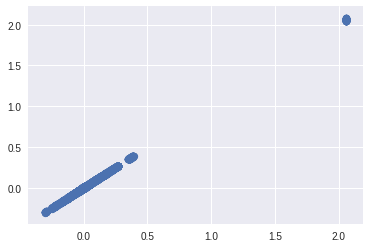

In [28]:
plt.scatter(
    dataset_ethan.testing[1],
    p_ethan
)
plt.show()

In [14]:
from SCFInitialGuess.utilities.analysis import mf_initializer, measure_all_quantities, make_results_str

results_ethan = measure_all_quantities(
    p_ethan,
    dataset_ethan,
    molecules_ethan[1],
    0,
    mf_initializer,
    dim_ethan,
    True
)

[ ] 2018-04-26 11:56:57: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:00: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:02: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:04: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:06: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:08: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:09: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:11: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:13: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:16: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:17: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:19: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:22: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:23: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:26: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:27: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:30: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:33: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:35: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:37: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:39: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:41: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:43: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:45: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:47: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:49: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:51: Iteration calculation: 26


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:53: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:55: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:57: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:57:59: Iteration calculation: 30


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:58:01: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:58:03: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:58:05: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:58:08: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:58:09: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:58:11: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:58:13: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:58:15: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:58:18: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:58:20: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:58:22: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:58:24: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:58:25: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:58:27: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:58:30: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:58:32: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:58:35: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:58:38: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 11:58:40: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [22]:
print(make_results_str(list(map(lambda x: [x], results_ethan))))

--- Absolute Error ---
7.62657E-01 +- 1.17922E-01
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.55637E-03 +- 3.93202E-04
--- Occupance Error ---
1.79991E+01 +- 6.03498E-02
--- Avg. Iterations ---
9.70000E+00 +- 1.02470E+00



## McWheeny that shit

In [31]:
def mc_wheeny_purification(p,s):
    return (3 * np.dot(np.dot(p, s), p) - np.dot(np.dot(np.dot(np.dot(p, s), p), s), p)) / 2

def multi_mc_wheeny(p, s, n_max=4):
    for i in range(n_max):
        p = mc_wheeny_purification(p, s)
    return p

In [29]:
from SCFInitialGuess.utilities.dataset import make_matrix_batch
s_ethan_raw = make_matrix_batch(dataset_ethan.inverse_input_transform(dataset_ethan.testing[0]), dim_ethan, True)
p_ethan_batch = make_matrix_batch(p_ethan, dim_ethan, True)

In [36]:
p_mcw1 = np.array(list(map(lambda x: multi_mc_wheeny(x[0], x[1], n_max=1), zip(p_ethan_batch, s_ethan_raw))))
p_mcw5 = np.array(list(map(lambda x: multi_mc_wheeny(x[0], x[1], n_max=5), zip(p_ethan_batch, s_ethan_raw))))

In [39]:
results_ethan = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim_ethan), p_mcw1)),
    dataset_ethan,
    molecules_ethan[1],
    0,
    mf_initializer,
    dim_ethan,
    True
)

[ ] 2018-04-26 12:18:35: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:36: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:37: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:38: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:39: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:40: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:41: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:42: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:42: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:43: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:44: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:45: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:46: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:47: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:48: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:48: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:49: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:50: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:51: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:52: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:53: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:54: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:54: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:55: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:56: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:57: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:58: Iteration calculation: 26


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:58: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:18:59: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:19:00: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:19:01: Iteration calculation: 30


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:19:02: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:19:03: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:19:03: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:19:04: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:19:05: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:19:06: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:19:07: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:19:08: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:19:08: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:19:09: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:19:10: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:19:11: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:19:12: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:19:13: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:19:14: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:19:15: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:19:16: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:19:17: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:19:18: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [40]:
print(make_results_str(list(map(lambda x: [x], results_ethan))))

--- Absolute Error ---
7.62615E-01 +- 1.17922E-01
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
5.17942E-05 +- 1.58451E-05
--- Occupance Error ---
1.80018E+01 +- 8.39718E-04
--- Avg. Iterations ---
7.30000E+00 +- 4.58258E-01



In [42]:
results_ethan = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim_ethan), p_mcw5)),
    dataset_ethan,
    molecules_ethan[1],
    0,
    mf_initializer,
    dim_ethan,
    True
)

[ ] 2018-04-26 12:23:44: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:23:44: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:23:45: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:23:46: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:23:47: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:23:48: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:23:49: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:23:50: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:23:51: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:23:52: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:23:53: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:23:54: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:23:55: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:23:56: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:23:56: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:23:57: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:23:58: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:23:59: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:00: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:01: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:02: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:02: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:03: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:04: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:05: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:06: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:07: Iteration calculation: 26


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:08: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:09: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:10: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:11: Iteration calculation: 30


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:12: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:13: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:14: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:15: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:15: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:17: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:19: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:21: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:23: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:26: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:28: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:30: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:31: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:33: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:35: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:37: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:39: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:41: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-04-26 12:24:43: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [43]:
print(make_results_str(list(map(lambda x: [x], results_ethan))))

--- Absolute Error ---
7.62611E-01 +- 1.17921E-01
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.24384E-17 +- 1.95367E-18
--- Occupance Error ---
1.80000E+01 +- 2.61070E-15
--- Avg. Iterations ---
7.22000E+00 +- 4.14246E-01

